In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221218_m1_raw.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-18 18:30:00,M-1グランプリ2022☆順位予想キャンペーン 私の三連単の順位予想は… 1位：敗者復活 ...,186025670,ucchirtyk
1,2022-12-18 18:30:00,こんばんは(๑╹ᆺ╹) もうすぐ #M1グランプリ 開催ですね！ うちの #猫型ロボット ...,765098304849883136,ci_Robotics
2,2022-12-18 18:30:00,M-1グランプリ2022☆順位予想キャンペーン 私の三連単の順位予想は… 1位：ロングコー...,1196420908883165185,540725shin
3,2022-12-18 18:30:00,さぁ毎年恒例のM1グランプリ🎙️ オズワルドがまさかの敗者復活戦に 回ってるのはショックやけ...,1288416150,katsuyan0926
4,2022-12-18 18:30:00,ライブオンライン-M-1グランプリ 2022 テレビ放送 生放送 生中継 無料 TV放送 ...,1590525105821847552,japan_concerts
...,...,...,...,...
350530,2022-12-18 22:14:59,からあげやったら優勝行けてたんかな #M1グランプリ,1394300474,taigakokokoyabu
350531,2022-12-18 22:14:59,こりゃラジオがおもろくなりそうだぜー #M1グランプリ #三四郎ANN0,1423091951901892620,justin_828639
350532,2022-12-18 22:14:59,M1は漫才やると取れないものになりましたね #M1グランプリ,291080375,shigewo_factory
350533,2022-12-18 22:14:59,#M1グランプリ #ウェストランド 優勝は納得の結果だった。絶叫する #有吉 という芸...,3274899726,abeyasyasyas


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-18 18:30:00,313
1,2022-12-18 18:31:00,351
2,2022-12-18 18:32:00,389
3,2022-12-18 18:33:00,360
4,2022-12-18 18:34:00,1317
...,...,...
220,2022-12-18 22:10:00,3021
221,2022-12-18 22:11:00,2561
222,2022-12-18 22:12:00,2061
223,2022-12-18 22:13:00,1566


In [4]:
filename =  "count_221218_m1_raw.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(9297, 313)

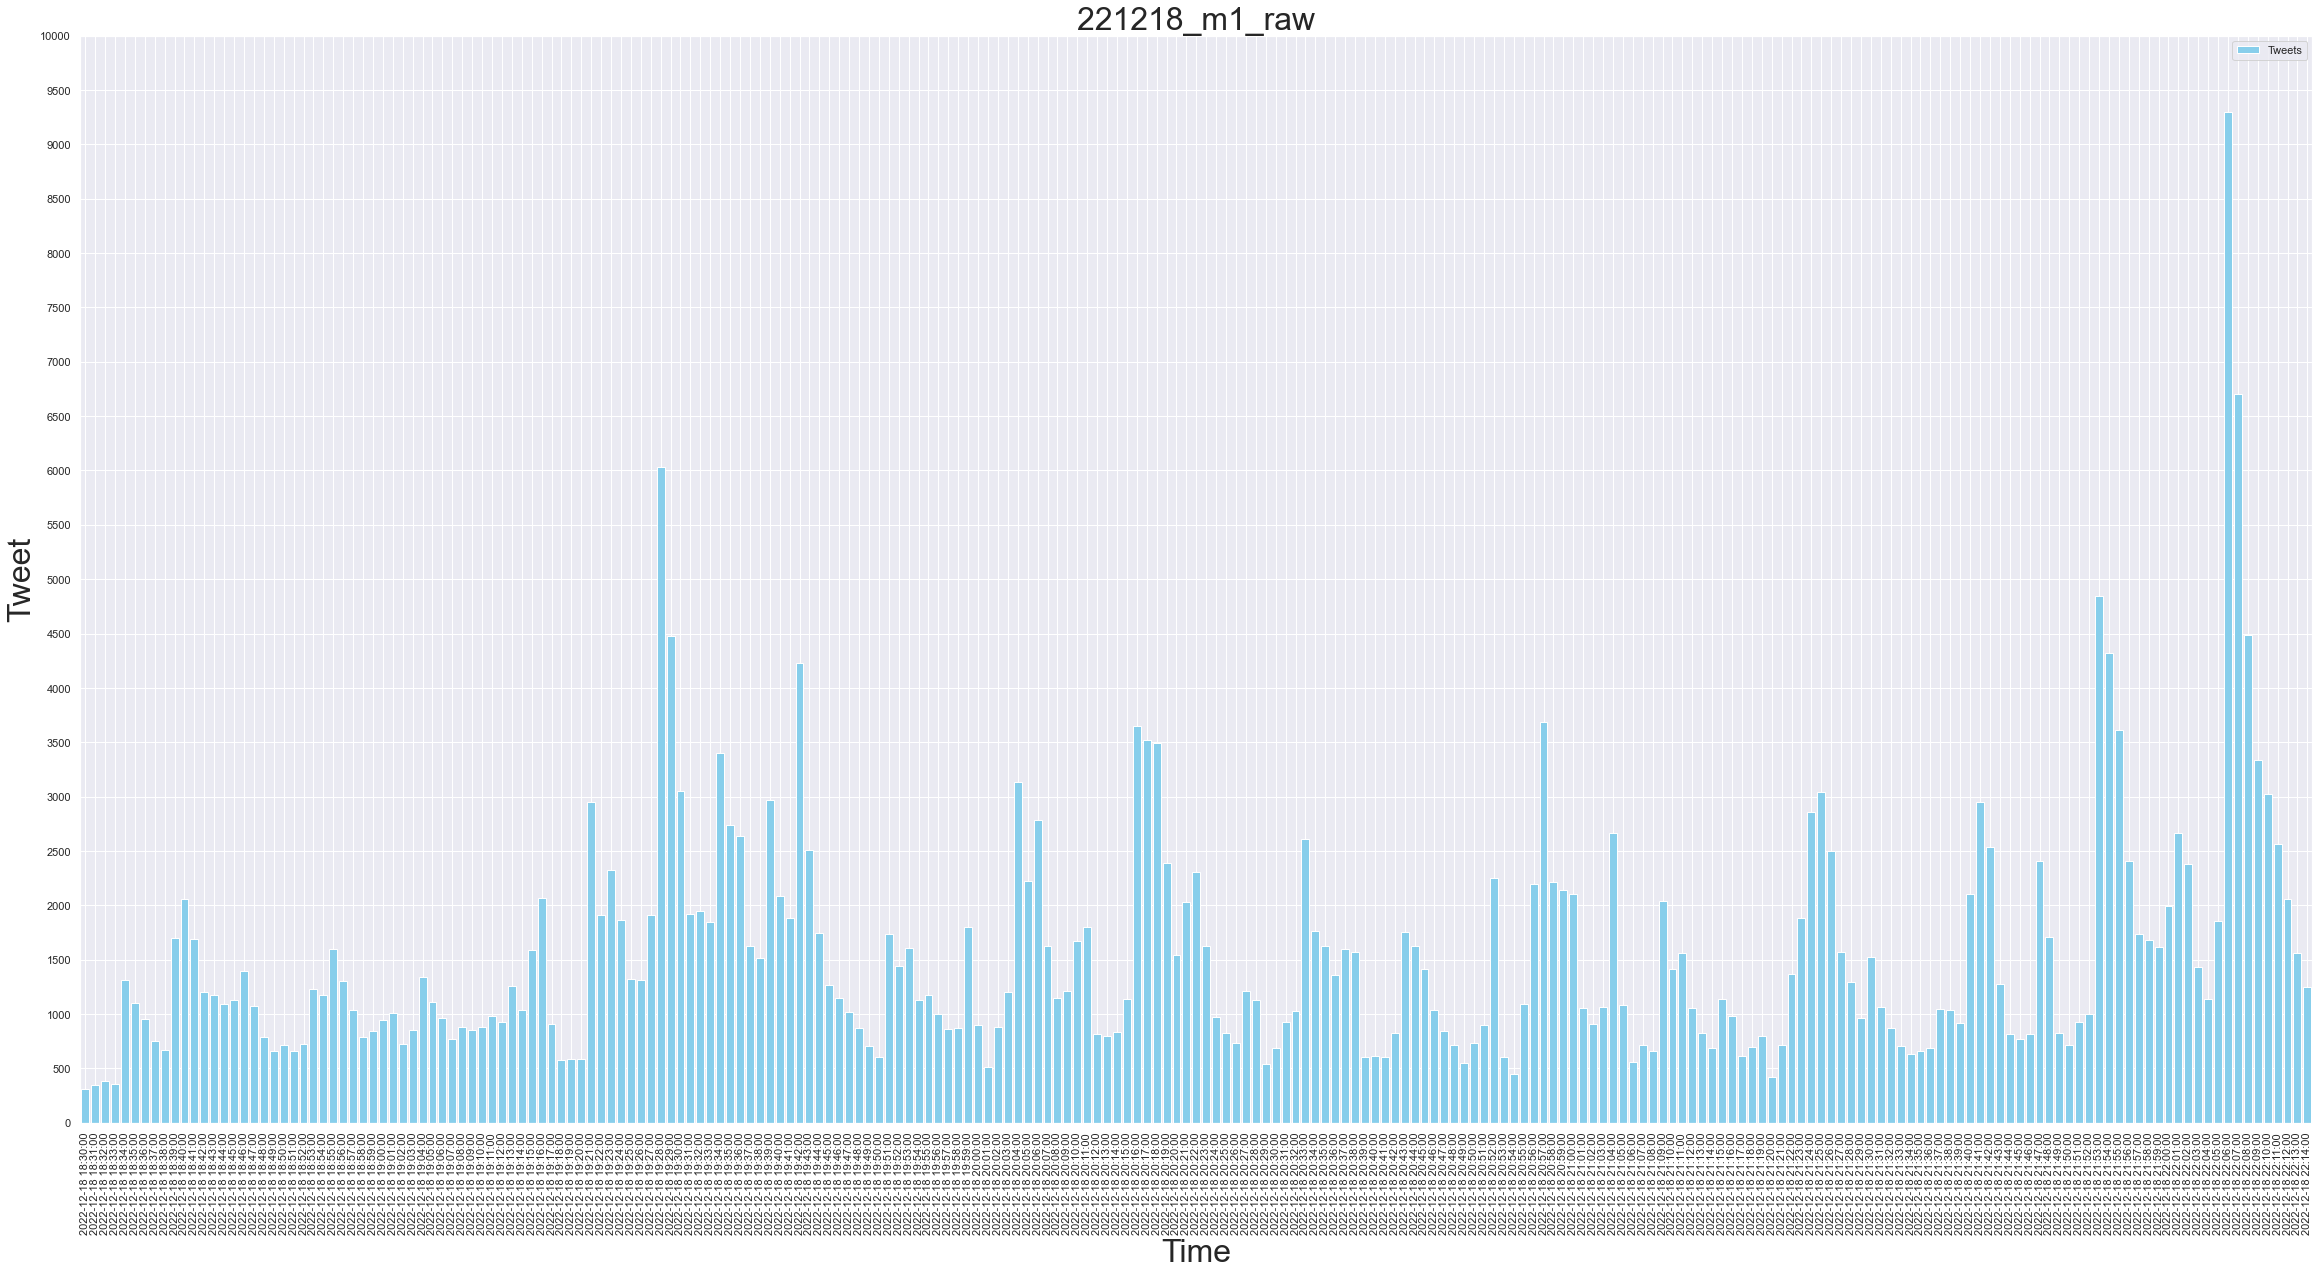

In [6]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221218_m1_raw", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 224.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 10000) # y軸の範囲を指定する
start = 0
end = 10001
stepsize = 500
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")